In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='poster', font_scale=0.9,
            rc={'xtick.major.size': 3,
                'ytick.major.size': 3,
                'xtick.major.width': 1,
                'ytick.major.width': 1,
                'xtick.major.pad': 3.5,
                'ytick.major.pad': 3.5,
                'axes.linewidth': 1,
                'lines.linewidth': 2,
               })

from src.data_processing import open_mfdataset

In [3]:
ripple_info = open_mfdataset(
    '../Processed-Data/bon_04_02.nc', concat_dim='session', group='/ripple_info'
).to_dataframe().set_index(['animal', 'day', 'epoch']).dropna()

In [4]:
ripple_info.head(5)

ripple_number ripple_trajectory ripple_direction  \
animal day epoch                                                     
bon    4   2                  1           inbound          reverse   
           2                  2          outbound          forward   
           2                  3          outbound          forward   
           2                  4          outbound          forward   
           2                  5          outbound          forward   

                  ripple_state_probability  ripple_start_time  \
animal day epoch                                                
bon    4   2                      0.729542        2463.827467   
           2                      0.733113        2480.077367   
           2                      0.709940        2484.081367   
           2                      0.667531        2494.309367   
           2                      0.708462        2504.185467   

                  ripple_end_time  number_of_unique_neurons_spiking  \
animal day epoch                                                      
bon    4   2          2463.872800                                15   
           2          2480.125367                                14   
           2          2484.203467                                20   
           2          2494.426133                                20   
           2          2504.226800                                18   

                  number_of_spikes session_time is_spike trajectory_direction  \
animal day epoch                                                                
bon    4   2                    65        early  isSpike             Outbound   
           2                    71        early  isSpike              Inbound   
           2                   199        early  isSpike              Inbound   
           2                   259        early  isSpike              Inbound   
           2                   103        early  isSpike              Inbound   

                 trajectory_turn  trial_number  linear_distance  x_position  \
animal day epoch                                                              
bon    4   2                Left           1.0         4.944726  221.441206   
           2               Right           3.0         0.000000  218.060067   
           2               Right           3.0         0.000000  217.568402   
           2               Right           3.0         0.084347  217.092973   
           2               Right           3.0         0.176402  217.471350   

                  y_position  head_direction     speed  linear_position  \
animal day epoch                                                          
bon    4   2      134.233553        0.765282  3.799223         5.123426   
           2      143.450114        1.576337  1.206043         0.016869   
           2      141.858334        1.647564  0.312266         0.009656   
           2      141.412450        1.693860  0.513079        -0.085676   
           2      140.484396        1.656262  0.660817        -0.179268   

                 ripple_motion  
animal day epoch                
bon    4   2              away  
           2              away  
           2              away  
           2              away  
           2              away

In [5]:
len(ripple_info)

198

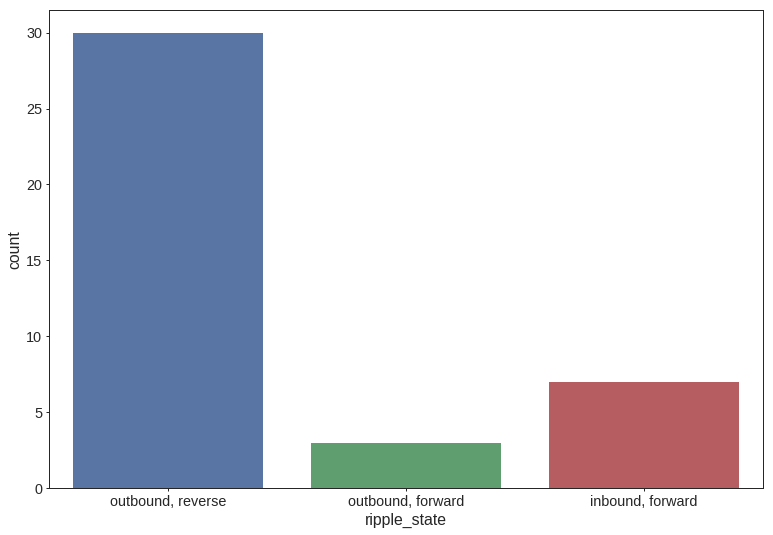

In [6]:
ripple_info['ripple_state'] = ripple_info.ripple_trajectory.str.cat(ripple_info.ripple_direction, sep=', ')
sns.countplot(x='ripple_state', data=ripple_info.where(ripple_info.ripple_state_probability >= 0.9));

In [7]:
posterior_density = open_mfdataset(
    '../Processed-Data/bon_03_02.nc', concat_dim='session', group='/posterior_density'
)

posterior_density

<xarray.Dataset>
Dimensions:                        (linear_distance: 61, ripple_number: 212, state: 4, time: 580)
Coordinates:
  * time                           (time) float64 0.0 0.0006667 0.001333 ...
  * state                          (state) object 'outbound_forward' ...
  * linear_distance                (linear_distance) float64 1.541 4.623 ...
Dimensions without coordinates: ripple_number
Data variables:
    __xarray_dataarray_variable__  (ripple_number, time, state, linear_distance) float64 0.09667 ...

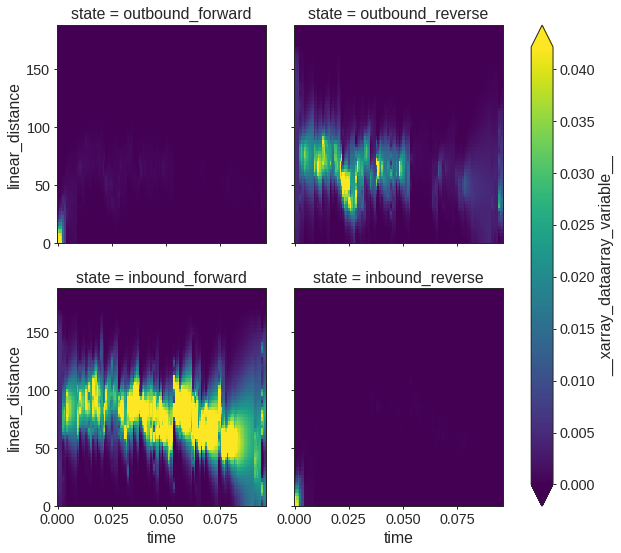

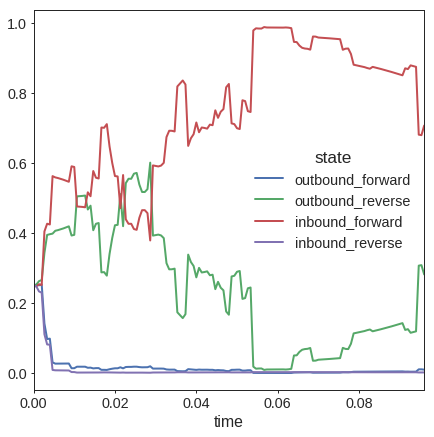

In [8]:
from ipywidgets import interact

@interact(ripple_number=(0, len(posterior_density.ripple_number)), continuous_update=False)
def plot_ripple_state(ripple_number):
    (posterior_density['__xarray_dataarray_variable__']
     .sel(ripple_number=ripple_number).dropna('time')
     .plot(x='time', y='linear_distance', col='state', col_wrap=2, robust=True, size=4));
    (posterior_density['__xarray_dataarray_variable__']
     .sel(ripple_number=ripple_number).dropna('time').sum('linear_distance').to_pandas().plot(figsize=(7, 7)))

In [9]:
ripple_info.loc[ripple_info.ripple_state_probability >= 0.9]

ripple_number ripple_trajectory ripple_direction  \
animal day epoch                                                     
bon    4   2                 12          outbound          reverse   
           2                 16          outbound          reverse   
           2                 36          outbound          reverse   
           2                 40          outbound          reverse   
           2                 43          outbound          reverse   
           2                 46          outbound          reverse   
           2                 51          outbound          reverse   
           2                 52          outbound          reverse   
           2                 56          outbound          reverse   
           2                 61          outbound          forward   
           2                 64           inbound          forward   
           2                 87          outbound          reverse   
           2                 89          outbound          reverse   
           2                 90          outbound          reverse   
           2                 92          outbound          reverse   
           2                 96           inbound          forward   
           2                 97          outbound          reverse   
           2                105          outbound          reverse   
           2                124          outbound          reverse   
           2                132          outbound          reverse   
           2                135          outbound          reverse   
           2                138           inbound          forward   
           2                139          outbound          reverse   
           2                141          outbound          reverse   
           2                142           inbound          forward   
           2                146          outbound          reverse   
           2                149           inbound          forward   
           2                152           inbound          forward   
           2                157          outbound          reverse   
           2                158          outbound          forward   
           2                159          outbound          reverse   
           2                160          outbound          reverse   
           2                161          outbound          reverse   
           2                163          outbound          reverse   
           2                165           inbound          forward   
           2                171          outbound          forward   
           2                177          outbound          reverse   
           2                178          outbound          reverse   
           2                183          outbound          reverse   
           2                197          outbound          reverse   

                  ripple_state_probability  ripple_start_time  \
animal day epoch                                                
bon    4   2                      0.972354        2570.205367   
           2                      0.998395        2585.186033   
           2                      0.930994        2725.834133   
           2                      0.951028        2736.570133   
           2                      0.996544        2781.604133   
           2                      0.938319        2785.353467   
           2                      0.988037        2790.928133   
           2                      0.985582        2791.162133   
           2                      0.999853        2827.074700   
           2                      0.999249        2834.072033   
           2                      0.993684        2904.052700   
           2                      0.978663        2984.597467   
           2                      0.909602        2984.926800   
           2                      0.951234        2986.834133   
           2                      0.9